<h1> <b> AtliQ Hotels Data Analysis Project

In [ ]:
# Importing all of the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive # Connecting Drive to google colab
drive.mount('/content/drive')

Mounted at /content/drive


Importing Bookings Data to a data frame

In [ ]:
df_bookings = pd.read_csv("/content/drive/MyDrive/Data - Science Projects/AtliQ Hotel Dataset/Atliq Hospitality Challenge/fact_bookings.csv")

Exploratory Data Analysis of Booking Data

In [ ]:
df_bookings.head() #Checking the first 5 rows of the data using head function

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
df_bookings.info() #Checking the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [ ]:
df_bookings.describe() #Checking the statistical summary of the data using describe function

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [ ]:
df_bookings.shape #Checking the shape of the data

(134590, 12)

In [ ]:
print("Booking Dataset has: ",df_bookings.shape[0]," rows")
print("Booking Dataset has: ",df_bookings.shape[1]," columns")

Booking Dataset has:  134590  rows
Booking Dataset has:  12  columns


In [ ]:
df_bookings.isnull().sum() # Column wise missing/null values in the bookings dataset

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,77907
booking_status,0


<b> Clearly only ratings_given column has null values (77907). Rest of the columns have no missing or null values

In [ ]:
df_bookings.booking_platform.unique() #Unique values in the booking platform column

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [14]:
df_bookings.booking_platform.value_counts() #count of booking across different platforms

,count
booking_platform,
others,55066
makeyourtrip,26898
logtrip,14756
direct online,13379
tripster,9630
journey,8106
direct offline,6755


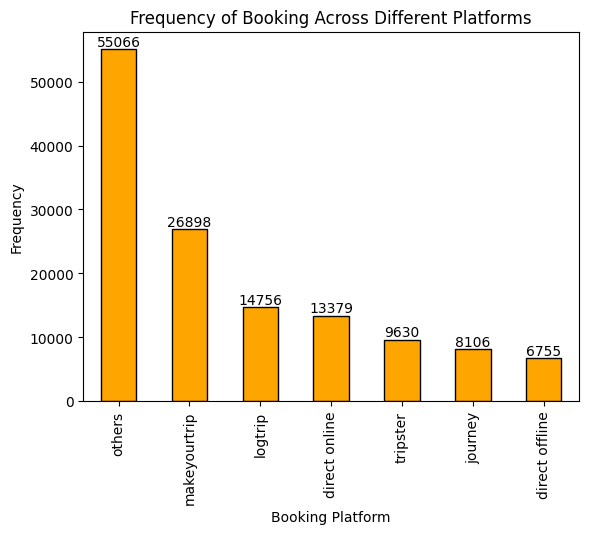

In [33]:
# Bar graph showing frequency of bookings over different Booking platforms
platform_counts = df_bookings.booking_platform.value_counts()
ax = platform_counts.plot(kind='bar',color = 'orange', edgecolor='black')
plt.xlabel('Booking Platform')
plt.ylabel('Frequency')
plt.title('Frequency of Booking Across Different Platforms')
for i, value in enumerate(platform_counts):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.show()

In [29]:
df_bookings.room_category.unique() #Unique values in the room type column

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

There are 4 different types of rooms available which are RT1, RT2, RT3, RT4

In [30]:
df_bookings.room_category.value_counts() #count of bookings across different room types

,count
room_category,
RT2,49505
RT1,38446
RT3,30566
RT4,16073


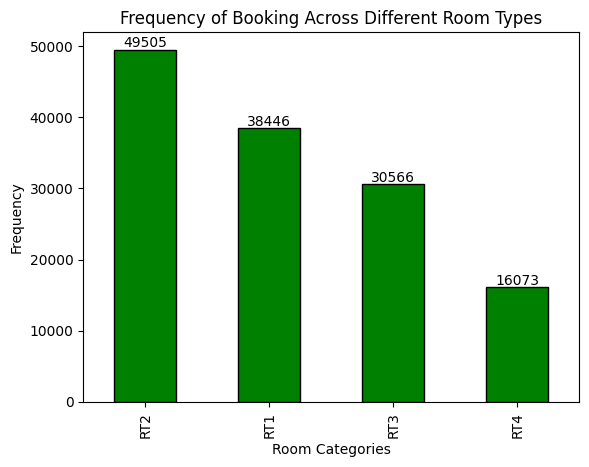

In [32]:
# Bar graph showing frequency of bookings over different Booking platforms
platform_counts = df_bookings.room_category.value_counts()
ax = platform_counts.plot(kind='bar',color = 'green', edgecolor = 'black')
plt.xlabel('Room Categories')
plt.ylabel('Frequency')
plt.title('Frequency of Booking Across Different Room Types')
for i, value in enumerate(platform_counts):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.show()

In [34]:
# Reading rest of the csv files using read_csv() function in python
df_date = pd.read_csv('/content/drive/MyDrive/Data - Science Projects/AtliQ Hotel Dataset/Atliq Hospitality Challenge/dim_date.csv')
df_hotels = pd.read_csv('/content/drive/MyDrive/Data - Science Projects/AtliQ Hotel Dataset/Atliq Hospitality Challenge/dim_hotels.csv')
df_rooms = pd.read_csv('/content/drive/MyDrive/Data - Science Projects/AtliQ Hotel Dataset/Atliq Hospitality Challenge/dim_rooms.csv')
df_agg_bookings = pd.read_csv('/content/drive/MyDrive/Data - Science Projects/AtliQ Hotel Dataset/Atliq Hospitality Challenge/fact_aggregated_bookings.csv')

These files include dim_date, dim_hotels, dim_rooms, fact_aggregate_bookings

EDA of Dim_Hotel files

In [35]:
df_hotels.head() #Checking the first 5 rows of the data using head function

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Delhi
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [38]:
df_hotels.shape
print("Dim_Hotel Dataset has: ",df_hotels.shape[0]," rows")
print("Dim_Hotel Dataset has: ",df_hotels.shape[1]," columns")

Dim_Hotel Dataset has:  25  rows
Dim_Hotel Dataset has:  4  columns


In [39]:
df_hotels.info() #Checking the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


Hotels dataset does not have any null or missing values

In [41]:
df_hotels.property_name.unique() #Unique values in the property name column

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [42]:
df_hotels.property_name.value_counts() #count of bookings across different room types

,count
property_name,
Atliq Grands,4
Atliq Exotica,4
Atliq City,4
Atliq Blu,4
Atliq Bay,4
Atliq Palace,4
Atliq Seasons,1


In [43]:
df_hotels.category.unique() #Unique values in the category column

array(['Luxury', 'Business'], dtype=object)

In [44]:
df_hotels.category.value_counts() #count of bookings across different room types

,count
category,
Luxury,16
Business,9


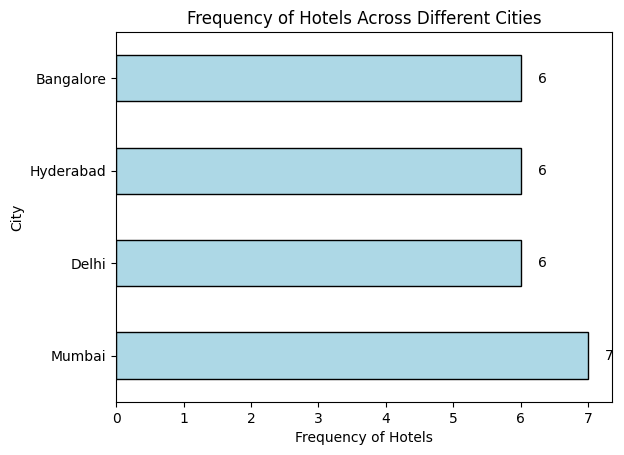

In [47]:
# Bar graph showing frequency of hotels in different cities
ax = df_hotels.city.value_counts().plot(kind='barh',color = 'lightblue', edgecolor = 'black')
plt.xlabel('Frequency of Hotels')
plt.ylabel('City')
plt.title('Frequency of Hotels Across Different Cities')
for i, value in enumerate(df_hotels.city.value_counts()):
    ax.text(value + 0.25, i, str(value), ha='left', va='center')
plt.show()


EDA of Agg_Bookings

In [48]:
df_agg_bookings.head() #Checking the first 5 rows of the data using head function

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [50]:
df_agg_bookings.shape #Checking the shape of the data
print("Agg_Bookings Dataset has: ",df_agg_bookings.shape[0]," rows")
print("Agg_Bookings Dataset has: ",df_agg_bookings.shape[1]," columns")

Agg_Bookings Dataset has:  9200  rows
Agg_Bookings Dataset has:  5  columns


In [51]:
df_agg_bookings.info()  #Checking the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


No null values in the aggregate bookings table

In [52]:
df_agg_bookings.property_id.unique() #Unique values in the property id column

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [55]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum()  #Total Bookings per property_id

,successful_bookings
property_id,
16558,3153
16559,7338
16560,4693
16561,4418
16562,4820
16563,7147
17558,5036
17559,6142
17560,6013


In [61]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity] # Days on which bookings are greater than capacity

,property_id,check_in_date,room_category,successful_bookings,capacity


In [65]:
df_agg_bookings[ df_agg_bookings['capacity'] == df_agg_bookings['capacity'].max()] #Properties having highest capacity


,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-May-22,RT2,38,50
128,17558,02-May-22,RT2,27,50
229,17558,03-May-22,RT2,26,50
328,17558,04-May-22,RT2,27,50
428,17558,05-May-22,RT2,29,50
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50
8828,17558,28-Jul-22,RT2,21,50
8928,17558,29-Jul-22,RT2,23,50
9028,17558,30-Jul-22,RT2,32,50


Data Cleaning

In [72]:
df_bookings[df_bookings['no_guests'] <= 0] # Cleaning invalid guests

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [73]:
df_bookings = df_bookings[df_bookings['no_guests'] > 0] # Removing invalid guests

In [74]:
df_bookings.shape # Shape of the new bookings dataframe

(134590, 12)

Outlier Removal in Revenue Generated

Minimum Revenue Generated

In [77]:
df_bookings['revenue_generated'].min() # Minimum Revenue Generated in df_bookings dataframe

6500

Maximum Revenue Generated

In [76]:
df_bookings['revenue_generated'].max() # Maximum Revenue Generated in df_bookings dataframe


45220

Average Revenue Generated

In [80]:
avg =  round(df_bookings['revenue_generated'].mean(),2) # Average Revenue Generated in df_bookings
std = round(df_bookings['revenue_generated'].std(),2) # Standard Deviation Generated in df_bookings


In [82]:
upper_limit = avg + 3*std
lower_limit = avg - 3*std
print("Upper Limit: ",upper_limit)
print("Lower Limit: ",lower_limit)

Upper Limit:  34274.62
Lower Limit:  -4442.6


In [84]:
df_bookings[df_bookings['revenue_generated'] <= 0]  # Cleaning invalid revenue generated

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [85]:
df_bookings[df_bookings['revenue_generated'] > upper_limit]


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,2022-04-27,2022-05-01,2022-05-07,4,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,2022-04-28,2022-05-01,2022-05-03,3,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,2022-04-24,2022-05-01,2022-05-07,5,RT4,logtrip,NaN,Checked Out,41990,41990
153,May012216559RT417,16559,2022-04-30,2022-05-01,2022-05-02,4,RT4,others,NaN,Cancelled,38760,15504
...,...,...,...,...,...,...,...,...,...,...,...,...
134467,Jul312219562RT45,19562,2022-07-28,2022-07-31,2022-08-01,6,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134469,Jul312219562RT47,19562,2022-07-10,2022-07-31,2022-08-06,5,RT4,makeyourtrip,NaN,Cancelled,37050,14820
134474,Jul312219562RT412,19562,2022-07-25,2022-07-31,2022-08-06,5,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,2022-07-31,2022-07-31,2022-08-01,4,RT4,makeyourtrip,4.0,Checked Out,38760,38760


In [86]:
df_bookings = df_bookings[df_bookings['revenue_generated'] <= upper_limit] # Removing invalid revenue generated

In [87]:
df_bookings.shape # Shape of the new bookings dataframe

(133070, 12)

In [90]:
df_bookings.revenue_realized.describe().round(2) # Statistical Summary of Revenue Realized

,revenue_realized
count,133070.00
mean,12468.78
std,6537.75
min,2600.00
25%,7600.00
50%,11400.00
75%,15300.00
max,34200.00


In [91]:
upper_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()


In [92]:
df_bookings[df_bookings['revenue_realized'] > upper_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
140,May012216559RT44,16559,2022-04-28,2022-05-01,2022-05-05,2,RT4,others,NaN,Checked Out,32300,32300
141,May012216559RT45,16559,2022-04-28,2022-05-01,2022-05-04,2,RT4,others,5.0,Checked Out,32300,32300
144,May012216559RT48,16559,2022-04-26,2022-05-01,2022-05-02,2,RT4,makeyourtrip,5.0,Checked Out,32300,32300
145,May012216559RT49,16559,2022-04-28,2022-05-01,2022-05-03,2,RT4,others,NaN,Checked Out,32300,32300
146,May012216559RT410,16559,2022-04-30,2022-05-01,2022-05-06,2,RT4,logtrip,NaN,No Show,32300,32300
...,...,...,...,...,...,...,...,...,...,...,...,...
134580,Jul312217564RT41,17564,2022-07-31,2022-07-31,2022-08-02,1,RT4,direct online,NaN,Checked Out,32300,32300
134582,Jul312217564RT43,17564,2022-07-31,2022-07-31,2022-08-03,1,RT4,others,1.0,Checked Out,32300,32300
134584,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-08-01,2,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300


In [95]:
df_bookings[df_bookings['room_category'] == 'RT4'].revenue_realized.describe().round(2)

,revenue_realized
count,14553.00
mean,22483.44
std,8338.25
min,7600.00
25%,19000.00
50%,22800.00
75%,31350.00
max,34200.00
